In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Reading the data taken from Yahoo Finance
# We will predict on basis of Adjusted Close price
read_list = ["Date", "Adj Close"]
coke = pd.read_csv("COKE.csv", usecols=read_list)
coke.set_index('Date', inplace=True)
tesla = pd.read_csv("TSLA.csv", usecols=read_list)
tesla.set_index('Date', inplace=True)
amazon = pd.read_csv("AMZN.csv", usecols=read_list)
amazon.set_index('Date', inplace=True)
coke.head()

,Adj Close
Date,
2020-06-15,236.470947
2020-06-16,240.445496
2020-06-17,239.100723
2020-06-18,242.886002
2020-06-19,239.339783


In [17]:
#Putting all different stocks into one
stocks = pd.concat([amazon,coke,tesla], axis=1)
stocks.columns = ['amazon','coke','tesla']
stocks.head()

,amazon,coke,tesla
Date,,,
2020-06-15,2572.679932,236.470947,198.179993
2020-06-16,2615.270020,240.445496,196.425995
2020-06-17,2640.979980,239.100723,198.358002
2020-06-18,2653.979980,242.886002,200.792007
2020-06-19,2675.010010,239.339783,200.179993


In [18]:
# Normalizing data using logarithmic returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,amazon,coke,tesla
Date,,,
2020-06-15,NaN,NaN,NaN
2020-06-16,0.016419,0.016668,-0.008890
2020-06-17,0.009783,-0.005609,0.009788
2020-06-18,0.004910,0.015707,0.012196
2020-06-19,0.007893,-0.014708,-0.003053


In [20]:
#Calculating sharpe ratio for 10,000 different portfolios
np.random.seed(42)
num_ports = 10000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
  weights = np.array(np.random.random(3))
  weights = weights/np.sum(weights)

  all_weights[x,:] = weights
  ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
  vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))

  sharpe_arr[x] = ret_arr[x]/vol_arr[x]




In [21]:
#Optimum Portfolio
print(sharpe_arr.max())
print(sharpe_arr.argmax())

2.2483279880017553
7129


In [22]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

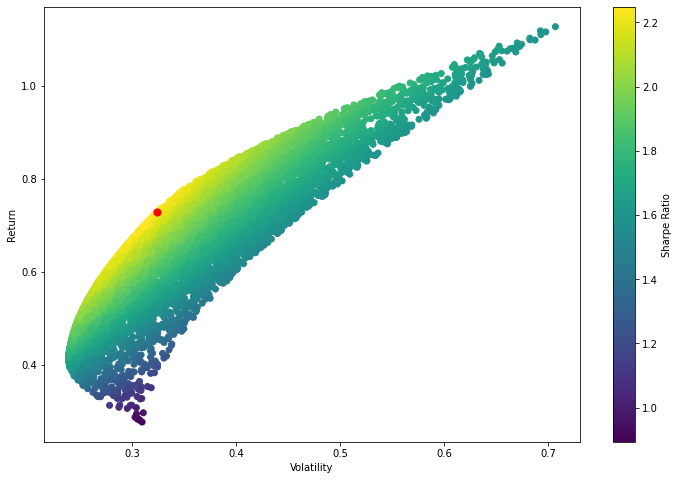

In [23]:
#Plotting the Sharpe ratios and optimal solution
plt.figure(figsize = (12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr,cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c = 'red', s = 50)
plt.show()